## Basic Machine Learning Applied to Bike Sharing Demand Data

---

In recent decades bike rentals have sprung up across cities. In order to best serve citizens in these cities it is vital to know how many bikes are needed at any time. If we can predict this well enough bikes can be supplied as to serve all the citizens with minimal waiting. In order to predict this we use machine learning, taking into account a wide number of variables. These include the hour of the day, the month, the temperature, the windspeed, etc..

Firstly, we import the relevant needed libraries.

In [1]:
#part 1 - importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Now, we read the necessary data:

In [2]:
#part 2 - reading the data
BikeData = pd.read_csv("SeoulBikeData_mod.csv") 

Below is what we'd call a description of the data. A brief summary with values such as mean listed for each of the variables.

In [3]:
#part 3 -describing the data
BikeData.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000
mean,665.802607,11.522512,9.476967,54.729147,1.883886,1342.977725,-0.066256,0.606507,0.097275,0.061280,3.492417
std,652.252686,6.930339,11.186973,20.994968,1.084647,622.576774,12.440532,0.910329,0.962272,0.348964,1.723804
min,20.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,177.000000,6.000000,1.100000,38.000000,1.000000,770.750000,-9.800000,0.000000,0.000000,0.000000,2.000000
50%,397.000000,12.000000,10.000000,53.000000,1.700000,1495.000000,0.600000,0.020000,0.000000,0.000000,3.000000
75%,1020.250000,18.000000,19.100000,70.000000,2.600000,1972.000000,10.425000,0.992500,0.000000,0.000000,5.000000
max,3556.000000,23.000000,32.700000,98.000000,7.400000,2000.000000,24.100000,3.520000,35.000000,4.100000,6.000000


Below we see a histogram and box plot for The amount of rented bikes in each entry of data. This illustrates to us that it is more common for there to be a smaller number of bikes rented per hour. It is in fact incredibly rare for there to be more than 2500 bikes rented per hour.

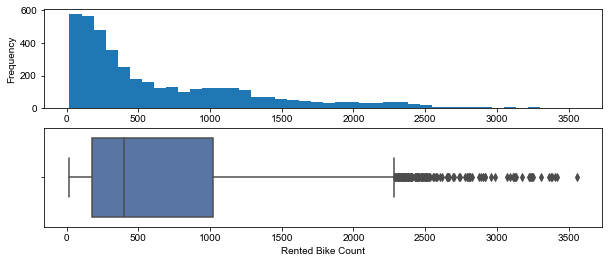

In [4]:
#part 4 our plots
#the histogram
X = BikeData['Rented Bike Count']
plt.figure(figsize=(10,4))
plt.subplot(211)
plt.hist(X, bins=42) #42 seemed like a nice number due to there being roughly 420 pieces of data
plt.xlabel("Rented Bike Count", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.subplot(212) #the box-plot
sns.set_theme(style="ticks")
sns.boxplot(x='Rented Bike Count', data=BikeData)
plt.show()

Below we also see violin plots corresponding to each month of the year. We notice that at the start of the year there is very little variation in the amount of bikes rented - with it being a very small amount on average. As time passes though, the average amount of bikes rented rises, but also the amount of variation.

We see a similar story with the violin plots for the hour of the day. As expected 8:00 and 18:00 appear to be local maximums in terms of the mean number of bikes rented. This makes sense as these times correspond to rush hour, where demand for transit is largest. Similarly to the months, when demand is largest we also see thinner plots, with a greater gap between the quartiles - indicating a larger variation in the rented bike count. This is all very similar to the original article.

[1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'the average count is high at each hour in the summer and low in the winter.' Computer Communications, Vol.153, pp.353-366, March, 2020.

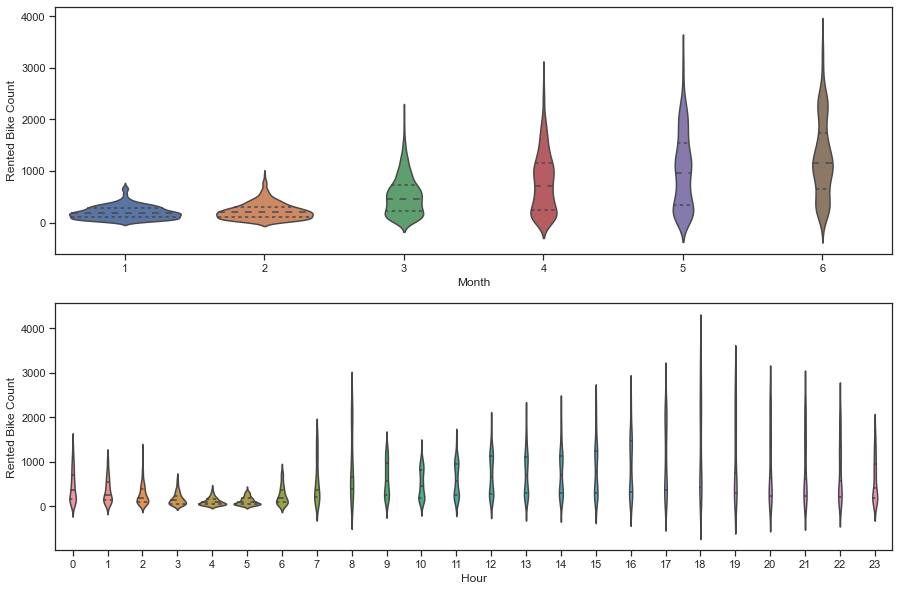

In [5]:
#part 5 - violin plots
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.violinplot(x='Month', y='Rented Bike Count', data=BikeData, inner='quartile') #plot doing month
plt.subplot(212)
sns.violinplot(x='Hour', y='Rented Bike Count', data=BikeData, inner='quartile') #plot doing hour
plt.show()

Now we seperate the rented bike count column from the rest of the data in order to allow a test train split to be made.

In [6]:
#part 6 - seperating our data
X = BikeData.drop(['Rented Bike Count'], axis=1)
y = BikeData['Rented Bike Count']

Now we do said test train split. With this split we set aside a quarter of the data to use a test - the same as used in the paper in the citation at the bottom of this document.

In [7]:
#part 7 - doing the test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Now we create and train our linear regression model.

In [8]:
#part 8 - creating and training linear regression
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

And now we create predictions for what the rented bike count will be, based off of all the other variables.

In [9]:
#part 9 - obtaining our predictions and making the residual
y_pred = regr.predict(X_test)
resid = y_test - y_pred

Below we have values for the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Rsquared (R2). The first 2 are pretty self explanitory based off of their name and are used as measures of error of our predictions of the rented bike count, versus the actual amount. The 3rd Rsquared, is the coefficient of determination.

In [10]:
#part 10 - creating our 3 variables
RMSE = np.sqrt(np.mean(resid**2))
print("The root mean squared error is:",RMSE)
MAE = np.mean(np.abs(resid))
print("The mean absolute error is:",MAE)
R2 = r2_score(y_test, y_pred)
print("Rsquared is:",R2)

The root mean squared error is: 388.57937286447935
The mean absolute error is: 288.0579011391443
Rsquared is: 0.6256068420172696


Finally we have some plots based off of our model

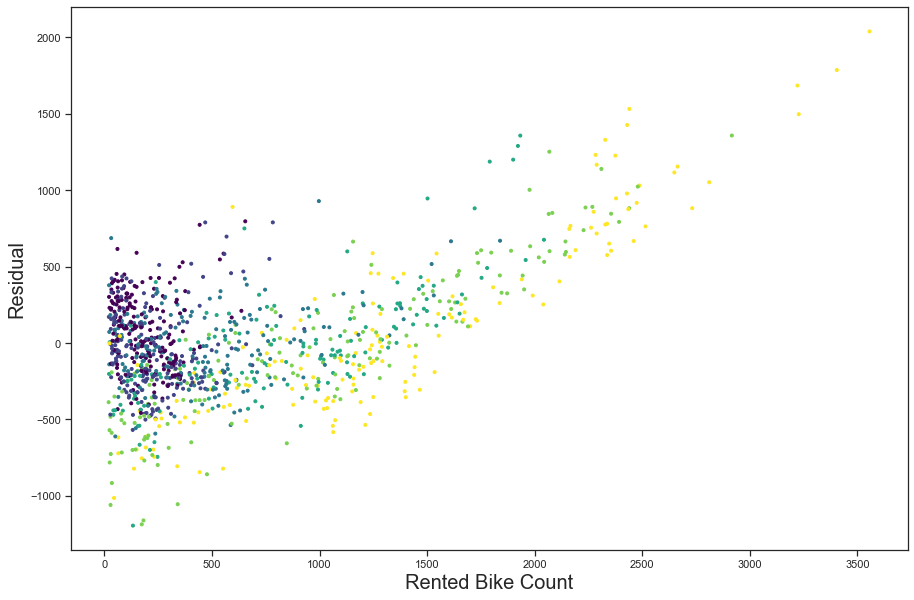

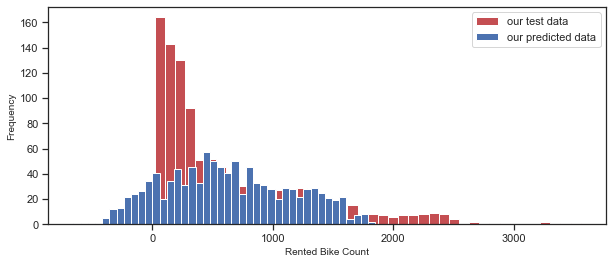

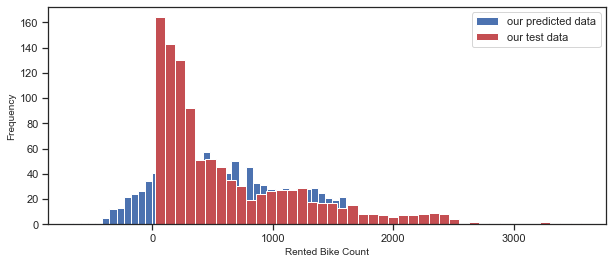

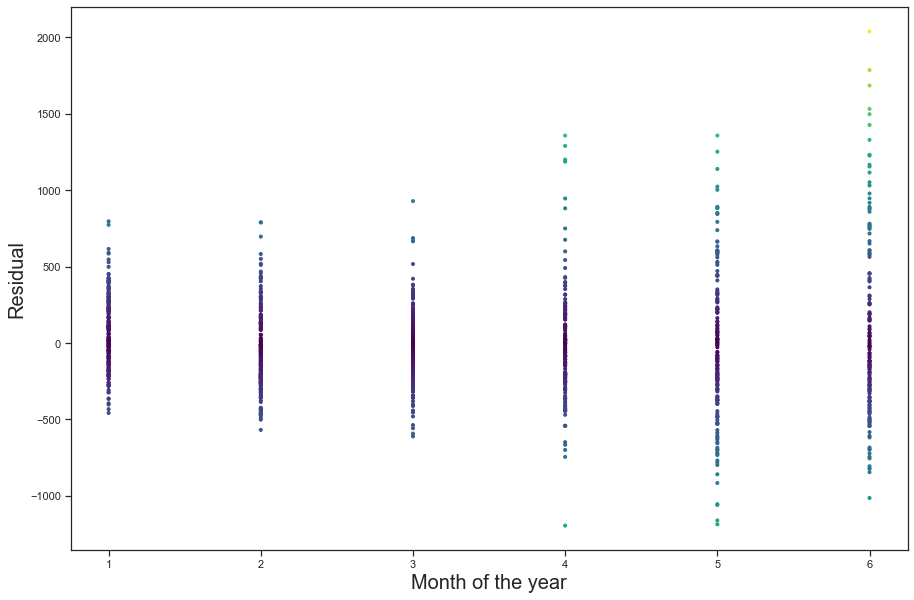

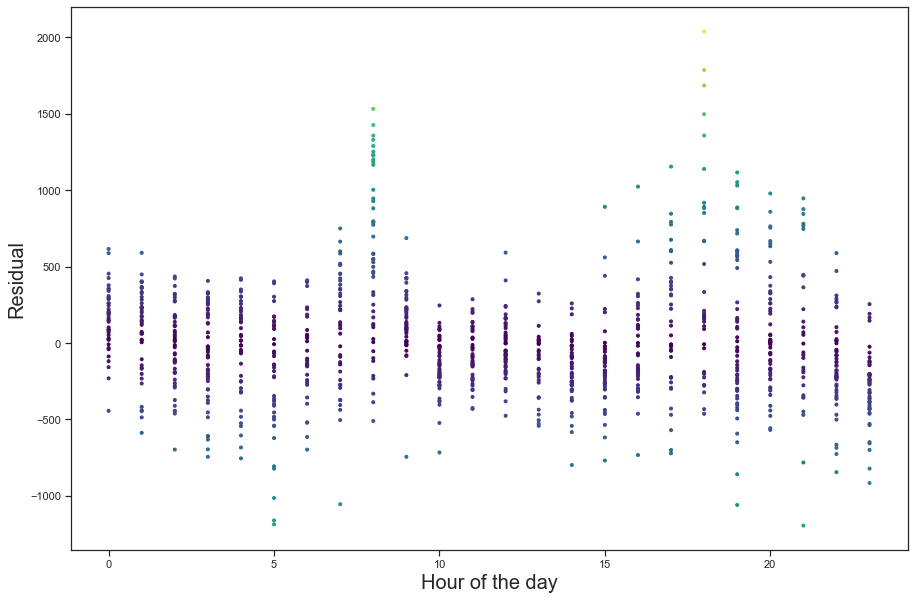

In [11]:
#part 11 - creating our plots
#Our scatter plot
plt.figure(figsize=(15,10))
plt.scatter(y_test, resid, marker='.',c=X_test['Month'], cmap='viridis')
plt.xlabel("Rented Bike Count", fontsize=20)
plt.ylabel("Residual", fontsize=20)
plt.show()
#Our histograms
plt.figure(figsize=(10,4))
plt.hist(y_test, bins=42, color='r', label='our test data')
plt.hist(y_pred, bins=42, color='b', label='our predicted data')
plt.legend()
plt.xlabel("Rented Bike Count", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.show()
#And show it the other way around
plt.figure(figsize=(10,4))
plt.hist(y_pred, bins=42, color='b', label='our predicted data')
plt.hist(y_test, bins=42, color='r', label='our test data')
plt.legend()
plt.xlabel("Rented Bike Count", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.show()
#Our 2nd scatter plot
plt.figure(figsize=(15,10))
plt.scatter(X_test['Month'], resid, marker='.',c=abs(resid), cmap='viridis')
plt.xlabel("Month of the year", fontsize=20)
plt.ylabel("Residual", fontsize=20)
plt.show()
#Our final one
plt.figure(figsize=(15,10))
plt.scatter(X_test['Hour'], resid, marker='.',c=abs(resid), cmap='viridis')
plt.xlabel("Hour of the day", fontsize=20)
plt.ylabel("Residual", fontsize=20)
plt.show()

Our first plot is a scatter plot of the rented bike count, against the risidual. The darker coloured points indicate an earlier month, and the lighter, more green looking points indicate a later month. Similarly to what we'd expect from the violin plots, our samples where more bikes are rented are further into the summer.

The second and third plots are essentially idectical. I included both to make it easier to read off values from either the predicted or test frequency. These histograms show off my predicted data as compared to the actual test data. You can see the predictions are similar, but with a few notable differences. Due to the use of the linear model and its limitations my model predicts some negative values for the amount of bikes rented per hour, which of course makes no practical sense. Presumeably, as a result of this, we do not see the huge spike of values, closer to 0 that we do in the test data.

The final 2 plots are both very similar scatter plots, with residual for each entry of test data plotted against the corresponding month or hour. They are both colored in such a way that the darker points represent points with an absolute residual being smaller. We see that we have a greater variation of risidual in the later months, or at the hours corresponding to rush hour or later in the day. This is similar to the violin plot where we saw that the variation at these times was greater. As we would expect it is harder to predict values in these times.

The root mean squared error is: 286.9665660060568
The mean absolute error is: 177.5667434293357
Rsquared is: 0.7958116221748961


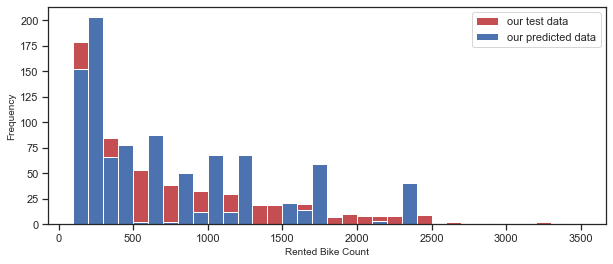

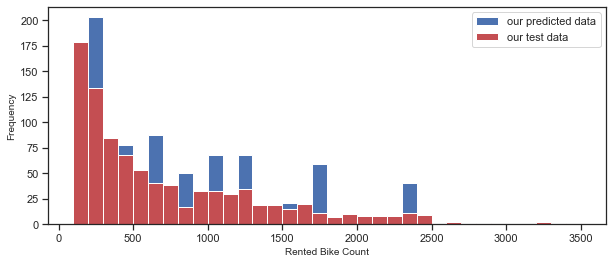

In [12]:
#part 12 - optional
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=6)
regr_1.fit(X_train, y_train)

#find our predictions
y_pred = regr_1.predict(X_test)

#find the residual and print the corresponding variables
resid=y_test-y_pred
RMSE = np.sqrt(np.mean(resid**2))
print("The root mean squared error is:",RMSE)
MAE = np.mean(np.abs(resid))
print("The mean absolute error is:",MAE)
R2 = r2_score(y_test, y_pred)
print("Rsquared is:",R2)

binsize=np.arange(100,3600,100) #making our binsize consistent

#plot the final histogram
plt.figure(figsize=(10,4))
plt.hist(y_test, bins=binsize, color='r', label='our test data')
plt.hist(y_pred, bins=binsize, color='b', label='our predicted data')
plt.legend()
plt.xlabel("Rented Bike Count", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.show()

#our second histogram
plt.figure(figsize=(10,4))
plt.hist(y_pred, bins=binsize, color='b', label='our predicted data')
plt.hist(y_test, bins=binsize, color='r', label='our test data')
plt.legend()
plt.xlabel("Rented Bike Count", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.show()

Finally I used the decision tree regressor in order to try and get another set of predictions for the amount of rented bikes for each entry. Similar to before I plotted 2 separate histograms. Our predicted data seems rather strange with peaks coming up periodically. If we increase depth size from 6 to 12, we see our predictions become alot nicer looking in comparison.

The root mean squared error is: 282.86292898197973
The mean absolute error is: 164.9716465591321
Rsquared is: 0.8016096765229028


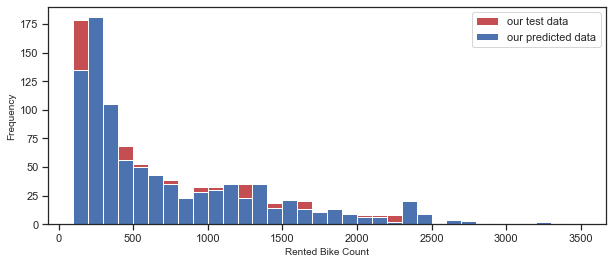

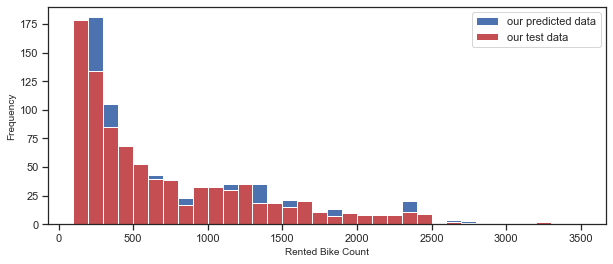

In [13]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=12)
regr_1.fit(X_train, y_train)

#find our predictions
y_pred = regr_1.predict(X_test)

#find the residual and print the corresponding variables
resid=y_test-y_pred
RMSE = np.sqrt(np.mean(resid**2))
print("The root mean squared error is:",RMSE)
MAE = np.mean(np.abs(resid))
print("The mean absolute error is:",MAE)
R2 = r2_score(y_test, y_pred)
print("Rsquared is:",R2)

binsize=np.arange(100,3600,100) #making our binsize consistent

#plot the final histogram
plt.figure(figsize=(10,4))
plt.hist(y_test, bins=binsize, color='r', label='our test data')
plt.hist(y_pred, bins=binsize, color='b', label='our predicted data')
plt.legend()
plt.xlabel("Rented Bike Count", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.show()

#our second histogram
plt.figure(figsize=(10,4))
plt.hist(y_pred, bins=binsize, color='b', label='our predicted data')
plt.hist(y_test, bins=binsize, color='r', label='our test data')
plt.legend()
plt.xlabel("Rented Bike Count", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.show()

This makes sense as a larger depth size takes into account "finer" details in the original data.

## Summary:

Our linear regression model seemed to work pretty well. However compared to the research in Computer Communications, Vol.153, pp.353-366, March, 2020 by Sathishkumar V E, Jangwoo Park, and Yongyun Cho, we must notice that it doesn't hold up. By all measures our linear regression is better than the LM model used in their paper, with RMS and MAE values being smaller and our R2 value being higher. These all indicate a very good fit. However by all the measures it does worse than every signle other model used in the paper.

Even though our decision tree regressor model holds up better, with higher RMS and MAE values, along with a lower R2 value. in fact our R2 value is roughly 0.17 higher - a significant improvement. However similarly it only beats the LM model, doing worse to all of the other entries.